In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import PyCapture2 as pc2
import devices.Camera
import daq
import file
%load_ext autoreload
%autoreload 1

In [2]:
%aimport devices.Camera
cam = devices.Camera.Camera(17583372)

Camera ID: Blackfly BFLY-PGE-31S4M,17583372,FV:1.61.3.0


In [3]:
info = cam.cam.getGigEImageSettings()
info.pixelFormat

2097152

In [4]:
pc2.PIXEL_FORMAT.RAW16

2097152

In [5]:
image = cam.take_photo()

In [6]:
print(len(image.getData())/(2048*1536))
print(image.getData()[0:100])

2.0
[48, 15, 0, 15, 16, 15, 16, 15, 0, 15, 32, 15, 32, 15, 0, 15, 0, 15, 240, 14, 32, 15, 0, 15, 0, 15, 0, 15, 16, 15, 16, 15, 0, 15, 16, 15, 16, 15, 16, 15, 0, 15, 16, 15, 32, 15, 0, 15, 0, 15, 240, 14, 16, 15, 16, 15, 0, 15, 32, 15, 0, 15, 0, 15, 0, 15, 0, 15, 16, 15, 16, 15, 16, 15, 240, 14, 240, 14, 16, 15, 0, 15, 0, 15, 0, 15, 16, 15, 0, 15, 16, 15, 0, 15, 16, 15, 0, 15, 32, 15]


In [7]:
%timeit image.save(b'/media/robert/Data_Storage/daq/test.tiff', pc2.IMAGE_FILE_FORMAT.TIFF)

70.9 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


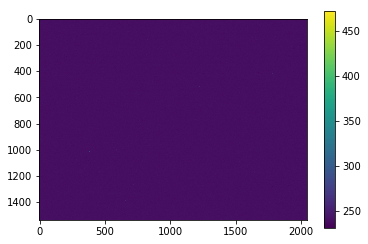

In [8]:
tiff = plt.imread('/media/robert/Data_Storage/daq/test.tiff')
plt.imshow(tiff/16)
plt.colorbar()
plt.show()

In [9]:
from PIL import Image
im = Image.open('/media/robert/Data_Storage/daq/test.tiff')
im.info

{'compression': 'tiff_lzw', 'dpi': (72.0, 72.0)}

In [10]:
shutPROP = pc2.PROPERTY_TYPE.SHUTTER
shut = cam.cam.getProperty(shutPROP)
print(shut)

In [11]:
cam.cam.disconnect()

In [2]:
daq.main([['Camera'], [17571186], 'cam_test', 10])

Camera ID: Blackfly BFLY-PGE-50A2M,17571186,FV:1.53.3.1
Attempt 0 of measurement 2 failed.
Attempt 0 of measurement 7 failed.
Attempt 1 of measurement 7 failed.
Attempt 0 of measurement 10 failed.
Attempt 1 of measurement 10 failed.
Total number of attempted measurements:  15
Number of successful measurements:       10
Total number of failed measurements:     5
Total measurement time:                  2.151 s
Begin post processing
Total post processing time:              12.487 s


In [7]:
from PIL import Image
dataSet = 1806150049

image = file.load_IMAGE(17583372, dataSet, 10)
print(file.decode_image_meta(image))

{'INSTR': 'Camera', 'ID': 'Blackfly BFLY-PGE-31S4M,17583372,FV:1.61.3.0', 'Serial number': 17583372, 'Timestamp': '2018/06/15/18/43/54/306188', 'Data set': 1806150049, 'Shot number': 10}


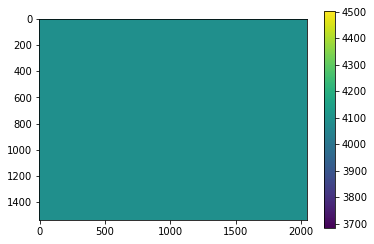

In [8]:
tiff = plt.imread('/media/robert/Data_Storage/daq/IMAGE/year_2018/month_06/day_15/1806150049/17583372_1806150049_0010.tiff')
plt.imshow(tiff)
plt.colorbar()
plt.show()

In [ ]:
import time
def callback(image, i):
    image.save(bytes('test.tiff', 'utf-8'), pc2.IMAGE_FILE_FORMAT.TIFF)
    print(time.clock())
#cam.cam.startCapture(callback)
cam.start_capture(callback)#, args=(1,))
time.sleep(1)
cam.cam.stopCapture()

0.936619
1.004296
1.095809
1.181486
1.265655
1.3523
1.439416
1.525067
1.611514
